In [ ]:
import pandas as pd

import io
import networkx as nx


In [74]:
# df2 = pd.read_csv(io.BytesIO(uploaded['playersHistoryMaster.csv']))
df2 = pd.read_csv('PlayersCombFixed.csv')
df2 = df2.drop(columns=['Unnamed: 0'])
df2


C:\Users\Owen\AppData\Local\Temp\ipykernel_20412\1402339541.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('PlayersCombFixed.csv')


Season          Squad              Comp Country  \
0       2010-2011        Levante        1. La Liga  es ESP   
1       2005-2006       Piacenza        2. Serie B  it ITA   
2       2006-2007         Modena        2. Serie B  it ITA   
3       2007-2008         Empoli        1. Serie A  it ITA   
4       2008-2009         Torino        1. Serie A  it ITA   
...           ...            ...               ...     ...   
104551  2019-2020         Zwolle     1. Eredivisie  nl NED   
104552  2020-2021         Zwolle     1. Eredivisie  nl NED   
104553  2020-2021  Werder Bremen     1. Bundesliga  de GER   
104554  2021-2022  Werder Bremen  2. 2. Bundesliga  de GER   
104555  2022-2023  Werder Bremen     1. Bundesliga  de GER   

                      Name        ID LgRank  MP  Gls CountryFixed   DOB  
0       Sergio-Abad-Beyxer  30f729b3   14th   1  0.0        Spain  1989  
1            Ignazio-Abate  1c529186   12th  13  0.0        Italy  1986  
2            Ignazio-Abate  1c529186   16th  38  1.0        Italy  1986  
3            Ignazio-Abate  1c529186   18th  24  1.0        Italy  1986  
4            Ignazio-Abate  1c529186   18th  25  1.0        Italy  1986  
...                    ...       ...    ...  ..  ...          ...   ...  
104551    Michael-Zetterer  9b688ae1   15th  13  0.0      Germany  1995  
104552    Michael-Zetterer  9b688ae1   13th  19  0.0      Germany  1995  
104553    Michael-Zetterer  9b688ae1   17th   0  NaN      Germany  1995  
104554    Michael-Zetterer  9b688ae1    2nd  11  0.0      Germany  1995  
104555    Michael-Zetterer  9b688ae1    5th   1  0.0      Germany  1995  

[104556 rows x 11 columns]

In [ ]:
df2['Country'] = df2['Country'].str.split(' ').str[1]
df2["Comp"] = df2["Comp"] + [" "] + df2["Country"]
df2

In [ ]:
df21 = df2.groupby(['CountryFixed']).agg({
                                'Name': 'unique',
                                'Country' : 'count'
                                         }).reset_index()
df21

In [ ]:
df111 = df21.sort_values('Country', ascending=False)
df111 = df111[:30]

lister = df111['CountryFixed'].to_list()
lister


In [ ]:
df3 = df2.groupby(['ID']).agg({
                                'Season':lambda x: list(x),
                                'Name': 'first',
                                'Squad': lambda x: list(x),
                                'Comp': lambda x: list(x),
                                'LgRank' : lambda x: list(x),
                                'CountryFixed': 'first',
                                'DOB' : 'first',
                                'MP' : 'sum',
                                'Gls' : 'sum',
                                         }).reset_index()
df3

In [ ]:
countries = df3['CountryFixed'].unique()
c = pd.DataFrame(countries)
c.rename(columns={0: 'Country'}, inplace=True)

for (i, row) in c.iterrows():
    c.at[i,'MapValue'] = int(i)


d1 = pd.Series(c.MapValue.values, index=c.Country).to_dict()
df3['CountryNum'] = df3['CountryFixed'].map(d1)

In [ ]:
df3

In [ ]:
for (i, row) in df3.iterrows():
    if(df3.at[i, 'DOB'] == "na Na"):
        print(df3.at[i, 'Name'])
        df3.at[i, 'DOB'] = 1990

In [ ]:
for (i,row) in df3.iterrows():
    df3.at[i, 'Age'] = 2022 - int(df3.at[i, 'DOB'])

df3

In [ ]:
comp = df2['Comp'].unique()
comp

In [ ]:
allLeagues = ['1. La Liga ESP', '2. Serie B ITA', '1. Serie A ITA',
       '1. Tippeligaen NOR', '1. Bundesliga GER', '3. 3. Liga GER',
       '1. Eliteserien NOR', '1. Division 1 FRA', '1. Ligue 1 FRA',
       '2. 2. Bundesliga GER', '1. Swiss Super League SUI',
       '2. Championship ENG', '1. Premier League ENG',
       '2. Segunda División ESP', '1. Super League GRE',
       '1. Primeira Liga POR', '1. Süper Lig TUR', '1. Pro League KSA',
       '2. Ligue 2 FRA', '1. Primera Div ARG', '1. Premier League SCO',
       'Jr. PL2 — Div. 2 ENG', '2. Championship SCO',
       '1. Premiership SCO', '1. Primera Div PAR', '1. Série A BRA',
       '1. First Division A BEL', '1. Eredivisie NED', '1. Superliga DEN',
       '1. Primera A COL', '1. MLS USA', '1. Super League CHN',
       '2. First Division ENG', '3. League One ENG',
       '1. First Division BEL', '1. Pro League BEL', '1. Liga I ROU',
       '1. Premier League RUS', '1. 1. HNL CRO',
       '1. Primera División MEX', '1. Primera División URU',
       '1. Liga MX MEX', '1. First League CZE', '3. USL USA',
       '2. NASL USA', '4. League Two ENG', '1. Premier League UKR',
       '1. Super League IND', '1. NB I HUN', '1. Veikkausliiga FIN',
       '2. USL Champ USA', '1. SuperLiga SRB', '1. A-League AUS',
       '1. Liga FUTVE VEN', '2. Série B BRA', '1. Top Division RUS',
       '1. Alpha Ethniki GRE', '1. I Liga POL', '1. Ekstraklasa POL',
       '1. Allsvenskan SWE', '2. Superettan SWE', '1. J1 League JPN',
       '1. Top League UKR', '1. Bundesliga AUT',
       '1. Primera División BOL', '2. Second Division BEL',
       '3. Second Division ENG', 'Jr. PL2 — Div. 1 ENG',
       '1. Super Lg SUI', '1. A Group BUL', '4. Third Division ENG',
       '2. J2 League JPN', '1. Primera División CHI',
       '5. Conf National ENG', '2. First Division B BEL',
       '2. Eerste Divisie NED', '1. First League BUL',
       '1. J.League Division 1 JPN', '1. K League KOR', '2. USL USA',
       '1. Liga Profesional BOL', '1. I-League IND', '1. Pro League IRN',
       '1. Descentralizado PER', '1. Liga 1 PER',
       '1. Premier Division RSA', '2. First Division SCO',
       '5. National League ENG', '1. Serie A ECU', '5. Conf Premier ENG',
       '1. CanPL CAN', '3. USL League One USA', '3. USL Pro USA',
       'Jr. U19 Bundesliga GER', 'Jr. U17 Bundesliga GER']


In [ ]:
mainleagues = ['1. Serie A ITA',
 '1. Premier League ENG',
 '1. La Liga ESP',
 '1. Ligue 1 FRA',
 '1. Bundesliga GER',
 '2. Championship ENG',
 '2. Serie B ITA',
 '2. Segunda División ESP',
 '2. Ligue 2 FRA',
 '2. 2. Bundesliga GER',
 '1. Eredivisie NED',
 '1. Primeira Liga POR',
 '1. Süper Lig TUR',
 '3. League One ENG',
 '3. 3. Liga GER',
 '1. Super League GRE',
 '1. Swiss Super League SUI',
 '1. First Division A BEL',
 '1. Premier League RUS',
 '1. MLS USA',
 '1. Série A BRA',
 '1. Primera Div ARG',
 '1. Superliga DEN',
 'Jr. PL2 — Div. 1 ENG',
 '4. League Two ENG',
 '1. Pro League BEL',
 '1. Bundesliga AUT',
 '1. Allsvenskan SWE',
 '1. Liga MX MEX',
 'Jr. PL2 — Div. 2 ENG',
 '1. 1. HNL CRO',
 '1. Ekstraklasa POL',
 '1. Liga I ROU',
 '1. Premiership SCO',
 '1. Division 1 FRA',
 '1. Premier League UKR',
 '1. Tippeligaen NOR',
 '1. SuperLiga SRB',
 '1. Premier League SCO',
 '2. Eerste Divisie NED']

In [ ]:
leagues = ['1. Serie A ITA', '1. Premier League ENG', '1. Bundesliga GER', '1. La Liga ESP', '1. Ligue 1 FRA',]
leagues2 = ['Serie A', 'Premier League', 'Bundesliga', 'La Liga', 'Ligue 1']
i = 0
for l in allLeagues:
    borb = []
    for row in df3['Comp']:
        borb.append(row.count(l))
            
    print(l, borb[10])
    df3[allLeagues[i]] = borb
    i += 1

In [ ]:
# leagues = ['1. Serie A ITA', '1. Premier League ENG', '1. Bundesliga GER', '1. La Liga ESP', '1. Ligue 1 FRA']
# leagues2 = ['Serie A', 'Premier League', 'Bundesliga', 'La Liga', 'Ligue 1']
# for l in leagues:
leagues = ['1. Serie A ITA', '1. Premier League ENG', '1. Bundesliga GER', '1. La Liga ESP', '1. Ligue 1 FRA']
borb = []
for row in df3['LgRank']:
    borb.append(row.count('1st'))
            
    # print(l, borb[10])
df3['first place'] = borb


In [ ]:
df3.loc[df3['3. USL Pro USA'] > 0]

In [ ]:
leagues = ['1. Serie A ITA', '1. Premier League ENG', '1. Bundesliga GER', '1. La Liga ESP', '1. Ligue 1 FRA']
leagues2 = ['Serie A', 'Premier League', 'Bundesliga', 'La Liga', 'Ligue 1']
i = 0
for l in leagues:
    borb = []
    for row in df3['Comp']:
        # Add 1 to the row and append it to next_year
        if l in row:
            borb.append(1)
        else:
            borb.append(0)
    print(l, borb[10])
    df3[leagues2[i]] = borb
    i += 1



#df3['LaLiga or Prem'] = borb
# edgesDf[edgesDf["MP1"] > 100]
# edgesDf.rename(columns={'source' : "Source", 'target' : 'Target'}, inplace=True)
# edgesDf.to_csv("edgesPremLa.csv", index=False)


In [ ]:
df3

In [ ]:
nodes = df2.groupby("ID").agg({
                                "Season": pd.Series.nunique,
                                "Squad": pd.Series.nunique,
                                "Comp": pd.Series.nunique,  
                                })

nodes = nodes.reset_index()
# nodes['Name'] = nodes.index
nodes


In [ ]:
nodes.rename(columns={'Season': 'numofSeasons', 'Squad': 'numofSquads', 'Comp':'numofComp'}, inplace=True)

In [ ]:
df5 = pd.merge(df3, nodes, on='ID', how='outer')
df5

In [ ]:
topc = ['Spain',
 'Italy',
 'France',
 'England',
 'Germany',
 'Brazil',
 'Argentina',
 'Netherlands',
 'Portugal',
 'Senegal',
 'Belgium',
 'Serbia',
 'Denmark',
 'Ireland',
 'Uruguay',
 'Croatia',
 'Switzerland',
 'Scotland',
 'Sweden',
 'Ivory Coast']
#  'Austria',
#  'Poland',
#  'Nigeria',
#  'Ghana',
#  'Morocco',
#  'United States',
#  'Cameroon',
#  'Mali',
#  'Czech Republic',
#  'Wales']

In [ ]:
borb = []
for row in df5['CountryFixed']:
    if topc.count(row) > 0:
        borb.append(row)
    else:
        borb.append('Other')
            
    # print(l, borb[10])
df5['Country Filter'] = borb
df5

In [ ]:
dfdt = df5.loc[df5['CountryFixed'].isin(topc)]
dfdt

In [ ]:
dfdt = df5
dfdt

In [140]:
df5

ID                                             Season  \
0     0000acda  [2012-2013, 2013-2014, 2014-2015, 2015-2016, 2...   
1     000b3da6  [2010-2011, 2011-2012, 2012-2013, 2013-2014, 2...   
2     001a63e0  [2010-2011, 2012-2013, 2013-2014, 2014-2015, 2...   
3     00242715  [2014-2015, 2015-2016, 2016-2017, 2017-2018, 2...   
4     00242b75  [2016-2017, 2016-2017, 2017-2018, 2018-2019, 2...   
...        ...                                                ...   
9695  ffd69308  [2011-2012, 2012-2013, 2013-2014, 2014-2015, 2...   
9696  ffec9769  [2013-2014, 2014-2015, 2015-2016, 2016-2017, 2...   
9697  ffed43e3  [2014-2015, 2015-2016, 2015-2016, 2015-2016, 2...   
9698  fff10a46  [2006-2007, 2006-2007, 2007-2008, 2008-2009, 2...   
9699  fffea3e5  [2018-2019, 2019-2020, 2020-2021, 2020-2021, 2...   

                          Name  \
0                Marco-Benassi   
1                Manuel-Iturra   
2               Ozkan-Yildirim   
3              Moussa-Niakhate   
4     Leandro-Barreiro-Martins   
...                        ...   
9695                Javi-Alamo   
9696             Islam-Slimani   
9697               Jack-Hendry   
9698             Danny-Guthrie   
9699               Jeremy-Doku   

                                                  Squad  \
0     [Inter, Livorno, Torino, Torino, Torino, Fiore...   
1     [União de Leiria, Real Murcia, Málaga, Granada...   
2     [Wrd Bremen II, Werder Bremen, Werder Bremen, ...   
3     [Valenciennes, Valenciennes, Valenciennes, Met...   
4     [Mainz U17, Mainz U19, Mainz U19, Mainz U19, M...   
...                                                 ...   
9695  [Recreativo, Zaragoza, Zaragoza, Zaragoza, Gir...   
9696  [Sporting CP, Sporting CP, Sporting CP, Sporti...   
9697  [Partick Thistle, Partick Thistle, Shrewsbury,...   
9698  [Southampton, Liverpool, Bolton, Newcastle Utd...   
9699  [Anderlecht, Anderlecht, Anderlecht, Rennes, R...   

                                                   Comp  \
0     [1. Serie A ITA, 1. Serie A ITA, 1. Serie A IT...   
1     [1. Primeira Liga POR, 2. Segunda División ESP...   
2     [3. 3. Liga GER, 1. Bundesliga GER, 1. Bundesl...   
3     [2. Ligue 2 FRA, 2. Ligue 2 FRA, 2. Ligue 2 FR...   
4     [Jr. U17 Bundesliga GER, Jr. U19 Bundesliga GE...   
...                                                 ...   
9695  [2. Segunda División ESP, 1. La Liga ESP, 2. S...   
9696  [1. Primeira Liga POR, 1. Primeira Liga POR, 1...   
9697  [1. Premiership SCO, 1. Premiership SCO, 3. Le...   
9698  [2. Championship ENG, 1. Premier League ENG, 1...   
9699  [1. First Division A BEL, 1. First Division A ...   

                                                 LgRank CountryFixed   DOB  \
0     [9th, 20th, 9th, 12th, 9th, 8th, 16th, 10th, 1...        Italy  1994   
1     [10th, 18th, 6th, 15th, 17th, 17th, 18th, 8th,...        Chile  1984   
2      [18th, 14th, 12th, 10th, 13th, 17th, 11th, 17th]      Germany  1993   
3     [16th, 12th, 13th, 20th, 12th, 13th, 12th, 8th...       France  1996   
4     [10th, 10th, 16th, 9th, 12th, 13th, 12th, 8th,...   Luxembourg  2000   
...                                                 ...          ...   ...   
9695  [17th, 20th, 14th, 6th, 4th, 19th, 15th, 18th,...        Spain  1988   
9696  [2nd, 3rd, 2nd, 3rd, 12th, 9th, 10th, 6th, 9th...      Algeria  1988   
9697  [8th, 9th, 20th, 1st, 23rd, 12th, 9th, 1st, 1s...     Scotland  1995   
9698  [6th, 3rd, 16th, 18th, 1st, 12th, 5th, 19th, 7...      England  1987   
9699                     [6th, 8th, 4th, 6th, 4th, 6th]      Belgium  2002   

       MP   Gls  ...  1. CanPL CAN  3. USL League One USA  3. USL Pro USA  \
0     216  26.0  ...             0                      0               0   
1     234   2.0  ...             0                      0               0   
2      58   4.0  ...             0                      0               0   
3     237  10.0  ...             0                      0               0   
4     150  14.0  ...             0

In [ ]:
from sklearn.model_selection import train_test_split

import io
import networkx as nx
#from google.colab import files

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#from sympy import deg
%matplotlib inline
%pip install sklearn
%pip install -U scikit-learn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as pl

#0.1
# features = ["numofSeasons", "numofSquads", "numofComp", "MP", "Gls",
#  '1. Serie A ITA',
#  '1. Premier League ENG',
#  '1. La Liga ESP',
#  '1. Ligue 1 FRA',
#  '1. Bundesliga GER',
#  '2. Championship ENG',
#  '2. Serie B ITA',
#  '2. Segunda División ESP',
#  '2. Ligue 2 FRA',
#  '2. 2. Bundesliga GER',
#  '1. Eredivisie NED',
#  '1. Primeira Liga POR',
#  '1. Süper Lig TUR',
#  '3. League One ENG',
#  '3. 3. Liga GER',
#  '1. Super League GRE',
#  '1. Swiss Super League SUI',
#  '1. First Division A BEL',
#  '1. Premier League RUS',
#  '1. MLS USA',
#  '1. Série A BRA',
#  '1. Primera Div ARG',
#  '1. Superliga DEN',
#  'Jr. PL2 — Div. 1 ENG',
#  '4. League Two ENG',
#  '1. Pro League BEL',
#  '1. Bundesliga AUT',
#  '1. Allsvenskan SWE',
#  '1. Liga MX MEX',
#  'Jr. PL2 — Div. 2 ENG',
#  '1. 1. HNL CRO',
#  '1. Ekstraklasa POL',
#  '1. Liga I ROU',
#  '1. Premiership SCO',
#  '1. Division 1 FRA',
#  '1. Premier League UKR',
#  '1. Tippeligaen NOR',
#  '1. SuperLiga SRB',
#  '1. Premier League SCO',
#  '2. Eerste Divisie NED',
#   'first place']

features = ["numofSeasons", "numofSquads", "numofComp", "MP", "Gls",
       '1. La Liga ESP', '2. Serie B ITA', '1. Serie A ITA',
       '1. Tippeligaen NOR', '1. Bundesliga GER', '3. 3. Liga GER',
       '1. Eliteserien NOR', '1. Division 1 FRA', '1. Ligue 1 FRA',
       '2. 2. Bundesliga GER', '1. Swiss Super League SUI',
       '2. Championship ENG', '1. Premier League ENG',
       '2. Segunda División ESP', '1. Super League GRE',
       '1. Primeira Liga POR', '1. Süper Lig TUR', '1. Pro League KSA',
       '2. Ligue 2 FRA', '1. Primera Div ARG', '1. Premier League SCO',
       'Jr. PL2 — Div. 2 ENG', '2. Championship SCO',
       '1. Premiership SCO', '1. Primera Div PAR', '1. Série A BRA',
       '1. First Division A BEL', '1. Eredivisie NED', '1. Superliga DEN',
       '1. Primera A COL', '1. MLS USA', '1. Super League CHN',
       '2. First Division ENG', '3. League One ENG',
       '1. First Division BEL', '1. Pro League BEL', '1. Liga I ROU',
       '1. Premier League RUS', '1. 1. HNL CRO',
       '1. Primera División MEX', '1. Primera División URU',
       '1. Liga MX MEX', '1. First League CZE', '3. USL USA',
       '2. NASL USA', '4. League Two ENG', '1. Premier League UKR',
       '1. Super League IND', '1. NB I HUN', '1. Veikkausliiga FIN',
       '2. USL Champ USA', '1. SuperLiga SRB', '1. A-League AUS',
       '1. Liga FUTVE VEN', '2. Série B BRA', '1. Top Division RUS',
       '1. Alpha Ethniki GRE', '1. I Liga POL', '1. Ekstraklasa POL',
       '1. Allsvenskan SWE', '2. Superettan SWE', '1. J1 League JPN',
       '1. Top League UKR', '1. Bundesliga AUT',
       '1. Primera División BOL', '2. Second Division BEL',
       '3. Second Division ENG', 'Jr. PL2 — Div. 1 ENG',
       '1. Super Lg SUI', '1. A Group BUL', '4. Third Division ENG',
       '2. J2 League JPN', '1. Primera División CHI',
       '5. Conf National ENG', '2. First Division B BEL',
       '2. Eerste Divisie NED', '1. First League BUL',
       '1. J.League Division 1 JPN', '1. K League KOR', '2. USL USA',
       '1. Liga Profesional BOL', '1. I-League IND', '1. Pro League IRN',
       '1. Descentralizado PER', '1. Liga 1 PER',
       '1. Premier Division RSA', '2. First Division SCO',
       '5. National League ENG', '1. Serie A ECU', '5. Conf Premier ENG',
       '1. CanPL CAN', '3. USL League One USA', '3. USL Pro USA',
       'Jr. U19 Bundesliga GER', 'Jr. U17 Bundesliga GER']

x = dfdt[features]
y = dfdt['Country Filter']

# print(X)
# print(y)

dtree=RandomForestClassifier(n_estimators=100)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

#dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

In [ ]:
y_pred = dtree.predict(X_test)
y_pred

In [ ]:
from sklearn.metrics import accuracy_score
dfPreds = dfdt

# d1_inv = {v: k for k, v in d1.items()}

 
yp = pd.DataFrame(y_pred)
X_test['labels'] = y_pred
X_test['Actual'] = y_test
# # X_test = X_test.astype({'Actual':'int'})
# # X_test = X_test.astype({'labels':'int'})
# print(X_test.dtypes)
# X_test['Actual'] = X_test['Actual'].map(d1_inv)
# X_test['labels'] = X_test['labels'].map(d1_inv)
X_test[X_test['labels'] == X_test['Actual']]

print(accuracy_score(X_test['Actual'], X_test['labels']))
X_test[['labels', 'Actual']]

In [ ]:
import sklearn.metrics as skm
cfmat = skm.confusion_matrix(
    y_true=y_test,
    y_pred=y_pred,
    normalize='true')
cfmat

In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(cfmat, 
            xticklabels=dtree.classes_,
            yticklabels=dtree.classes_,
            annot=True)
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('Confusion Matrix')

In [ ]:
borb = []
for row in df5['Squad']:
        # Add 1 to the row and append it to next_year
    if 'Manchester Utd' in row:
        borb.append(1)
        print(1)
    else:
        borb.append(0)
    #print(l, borb[10])
df5['ManU'] = borb







In [ ]:
west = df5.loc[df5['westBrom'] == 1]
west

In [ ]:
prem = df5.loc[df5['1. Premier League ENG'] > 0]
prem

In [ ]:
df2

In [ ]:
list1 = df2.to_dict('records')
mylist = list1
len(mylist)

In [ ]:
df2['LgRank'] = df2['LgRank'].fillna('20th')
df2

In [ ]:
df12 = df2

In [ ]:
dftester = df2.loc[df2['ID'] == '0657888a']
dftester

In [ ]:
df12['LgRank'] = df12['LgRank'].map(lambda x: str(x)[:-2])
df12

In [ ]:
df2

In [ ]:
df12['LgRank'] = df12['LgRank'].fillna('20th')
df12['LgRank'] = df12['LgRank'].map(lambda x: str(x)[:-2])
df12['LgRank'] = df12['LgRank'].astype(int)
type(df12['LgRank'][0])

In [ ]:
dftest = df12.loc[df12['LgRank'] == 'n']
dftest

In [ ]:
#mynewlist = [{'node1':x['Name'], 'node2':y['Name'], 'season':x['seasons'], 'squad':x['Squad']} for x in mylist for y in mylist if  x['Squad'] == y['Squad'] and x['seasons'] == y['seasons'] and x['Name'] > y['Name']]
mynewlist = [{'Name1':x['Name'], 'Name2':y['Name'], 'Season':x['Season'], 'Squad':x['Squad'], 'Comp' : x['Comp'], 'LgRank':x['LgRank'] , 'Node1':x['ID'], 'Node2':y['ID'], 'Nation1':x['CountryFixed'], 'Nation2':y['CountryFixed'], 'Born1':x['DOB'], 'Born2':y['DOB'], 'Gls1':x['Gls'], 'Gls2':y['Gls'], 'MP1':x['MP'], 'MP2':y['MP']} for x in mylist for y in mylist if  x['Squad'] == y['Squad'] and x['Season'] == y['Season'] and x['Name'] > y['Name'] and x['Comp'] == y['Comp']]

edgesDf = pd.DataFrame(mynewlist)
edgesDf


#46 mins for full list (151,000)

In [ ]:
edgesDf['LgRank'] = edgesDf['LgRank'][:-1]
edgesDf

In [5]:
import pandas as pd
edgey = pd.read_csv('EdgesDirty.csv')
edgey

C:\Users\Owen\AppData\Local\Temp\ipykernel_29896\3248300862.py:2: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  edgey = pd.read_csv('EdgesDirty.csv')


Name1               Name2     Season          Squad  \
0       Sergio-Abad-Beyxer  Sergio-Ballesteros  2010-2011        Levante   
1       Sergio-Abad-Beyxer    David-Cerrajeria  2010-2011        Levante   
2       Sergio-Abad-Beyxer          Rafa-Jorda  2010-2011        Levante   
3       Sergio-Abad-Beyxer        Gorka-Larrea  2010-2011        Levante   
4       Sergio-Abad-Beyxer    Cristhian-Stuani  2010-2011        Levante   
...                    ...                 ...        ...            ...   
901966    Michael-Zetterer          Ilia-Gruev  2022-2023  Werder Bremen   
901967    Michael-Zetterer         Amos-Pieper  2022-2023  Werder Bremen   
901968    Michael-Zetterer       Romano-Schmid  2022-2023  Werder Bremen   
901969    Michael-Zetterer        Lee-Buchanan  2022-2023  Werder Bremen   
901970    Michael-Zetterer          Jens-Stage  2022-2023  Werder Bremen   

               League LeagueRank LeagueCountry  Nation1   Nation2 Born1 Born2  \
0          1. La Liga       14th        es ESP    Spain     Spain  1989  1975   
1          1. La Liga       14th        es ESP    Spain     Spain  1989  1983   
2          1. La Liga       14th        es ESP    Spain     Spain  1989  1984   
3          1. La Liga       14th        es ESP    Spain     Spain  1989  1984   
4          1. La Liga       14th        es ESP    Spain   Uruguay  1989  1986   
...               ...        ...           ...      ...       ...   ...   ...   
901966  1. Bundesliga        5th        de GER  Germany  Bulgaria  1995  2000   
901967  1. Bundesliga        5th        de GER  Germany   Germany  1995  1998   
901968  1. Bundesliga        5th        de GER  Germany   Austria  1995  2000   
901969  1. Bundesliga        5th        de GER  Germany   England  1995  2001   
901970  1. Bundesliga        5th        de GER  Germany   Denmark  1995  1996   

        MP1  MP2  Goals1  Goals2     Node1     Node2  
0         1   35     0.0     1.0  30f729b3  29863c56  
1         1    9     0.0     0.0  30f729b3  2ebb9df6  
2         1   17     0.0     2.0  30f729b3  05e805eb  
3         1    6     0.0     0.0  30f729b3  242e09b6  
4         1   30     0.0     8.0  30f729b3  220c11f1  
...     ...  ...     ...     ...       ...       ...  
901966    1    8     0.0     0.0  9b688ae1  1fc4f3d1  
901967    1    8     0.0     0.0  9b688ae1  526ea7cc  
901968    1    8     0.0     0.0  9b688ae1  220ace7e  
901969    1    7     0.0     1.0  9b688ae1  45e95f21  
901970    1    8     0.0     0.0  9b688ae1  1fffae99  

[901971 rows x 17 columns]

In [6]:
edgey['LeagueCountry'] = edgey['LeagueCountry'].str.split(' ').str[1]
edgey["Comp"] = edgey["League"] + [" "] + edgey["LeagueCountry"]
edgey

Name1               Name2     Season          Squad  \
0       Sergio-Abad-Beyxer  Sergio-Ballesteros  2010-2011        Levante   
1       Sergio-Abad-Beyxer    David-Cerrajeria  2010-2011        Levante   
2       Sergio-Abad-Beyxer          Rafa-Jorda  2010-2011        Levante   
3       Sergio-Abad-Beyxer        Gorka-Larrea  2010-2011        Levante   
4       Sergio-Abad-Beyxer    Cristhian-Stuani  2010-2011        Levante   
...                    ...                 ...        ...            ...   
901966    Michael-Zetterer          Ilia-Gruev  2022-2023  Werder Bremen   
901967    Michael-Zetterer         Amos-Pieper  2022-2023  Werder Bremen   
901968    Michael-Zetterer       Romano-Schmid  2022-2023  Werder Bremen   
901969    Michael-Zetterer        Lee-Buchanan  2022-2023  Werder Bremen   
901970    Michael-Zetterer          Jens-Stage  2022-2023  Werder Bremen   

               League LeagueRank LeagueCountry  Nation1   Nation2 Born1 Born2  \
0          1. La Liga       14th           ESP    Spain     Spain  1989  1975   
1          1. La Liga       14th           ESP    Spain     Spain  1989  1983   
2          1. La Liga       14th           ESP    Spain     Spain  1989  1984   
3          1. La Liga       14th           ESP    Spain     Spain  1989  1984   
4          1. La Liga       14th           ESP    Spain   Uruguay  1989  1986   
...               ...        ...           ...      ...       ...   ...   ...   
901966  1. Bundesliga        5th           GER  Germany  Bulgaria  1995  2000   
901967  1. Bundesliga        5th           GER  Germany   Germany  1995  1998   
901968  1. Bundesliga        5th           GER  Germany   Austria  1995  2000   
901969  1. Bundesliga        5th           GER  Germany   England  1995  2001   
901970  1. Bundesliga        5th           GER  Germany   Denmark  1995  1996   

        MP1  MP2  Goals1  Goals2     Node1     Node2               Comp  
0         1   35     0.0     1.0  30f729b3  29863c56     1. La Liga ESP  
1         1    9     0.0     0.0  30f729b3  2ebb9df6     1. La Liga ESP  
2         1   17     0.0     2.0  30f729b3  05e805eb     1. La Liga ESP  
3         1    6     0.0     0.0  30f729b3  242e09b6     1. La Liga ESP  
4         1   30     0.0     8.0  30f729b3  220c11f1     1. La Liga ESP  
...     ...  ...     ...     ...       ...       ...                ...  
901966    1    8     0.0     0.0  9b688ae1  1fc4f3d1  1. Bundesliga GER  
901967    1    8     0.0     0.0  9b688ae1  526ea7cc  1. Bundesliga GER  
901968    1    8     0.0     0.0  9b688ae1  220ace7e  1. Bundesliga GER  
901969    1    7     0.0     1.0  9b688ae1  45e95f21  1. Bundesliga GER  
901970    1    8     0.0     0.0  9b688ae1  1fffae99  1. Bundesliga GER  

[901971 rows x 18 columns]

In [7]:
edges = edgey.groupby(['Node1', 'Node2']).agg({
                                                'Season':lambda x: list(x),
                                                'Name1': 'first',
                                                'Name2': 'first',
                                                'Squad': lambda x: list(x),
                                                'Comp': lambda x: list(x),
                                                'LeagueRank' : lambda x: list(x),
                                                'Nation1': 'first',
                                                'Nation2': 'first',
                                                'Born1' : 'first',
                                                'Born2' : 'first',
                                                'MP1' : 'sum',
                                                'MP2': 'sum',
                                                'Goals1' : 'sum',
                                                'Goals2' : 'sum'

                                                }).reset_index()

In [79]:
edges

Node1     Node2                                        Season  \
0       00242b75  00242715  [2018-2019, 2019-2020, 2020-2021, 2021-2022]   
1       00459419  001a63e0                        [2012-2013, 2013-2014]   
2       005c0807  0033fb1b                        [2020-2021, 2021-2022]   
3       007b39a5  001a63e0                                   [2017-2018]   
4       00891164  007faf7a                                   [2021-2022]   
...          ...       ...                                           ...   
560411  fffea3e5  f6d7d690                                   [2020-2021]   
560412  fffea3e5  f6ddac8f                                   [2018-2019]   
560413  fffea3e5  f99b71de             [2018-2019, 2019-2020, 2020-2021]   
560414  fffea3e5  fc46aab1                        [2021-2022, 2022-2023]   
560415  fffea3e5  feb5d3ab                                   [2018-2019]   

                           Name1            Name2  \
0       Leandro-Barreiro-Martins  Moussa-Niakhate   
1               Marko-Arnautovic   Ozkan-Yildirim   
2                Zinedine-Ferhat  Niclas-Eliasson   
3                 Onel-Hernandez   Ozkan-Yildirim   
4              Cedric-Hountondji   Lucas-Da-Cunha   
...                          ...              ...   
560411               Jeremy-Doku      Josh-Cullen   
560412               Jeremy-Doku   Ivan-Obradovic   
560413               Jeremy-Doku      Edo-Kayembe   
560414               Jeremy-Doku      Lovro-Majer   
560415               Jeremy-Doku    Dennis-Appiah   

                                           Squad  \
0       [Mainz 05, Mainz 05, Mainz 05, Mainz 05]   
1                 [Werder Bremen, Werder Bremen]   
2                                 [Nîmes, Nîmes]   
3                                 [Braunschweig]   
4                                [Clermont Foot]   
...                                          ...   
560411                              [Anderlecht]   
560412                              [Anderlecht]   
560413      [Anderlecht, Anderlecht, Anderlecht]   
560414                          [Rennes, Rennes]   
560415                              [Anderlecht]   

                                                     Comp  \
0       [1. Bundesliga GER, 1. Bundesliga GER, 1. Bund...   
1                  [1. Bundesliga GER, 1. Bundesliga GER]   
2                        [1. Ligue 1 FRA, 2. Ligue 2 FRA]   
3                                  [2. 2. Bundesliga GER]   
4                                        [1. Ligue 1 FRA]   
...                                                   ...   
560411                          [1. First Division A BEL]   
560412                          [1. First Division A BEL]   
560413  [1. First Division A BEL, 1. First Division A ...   
560414                   [1. Ligue 1 FRA, 1. Ligue 1 FRA]   
560415                          [1. First Division A BEL]   

                     LeagueRank     Nation1                           Nation2  \
0       [12th, 13th, 12th, 8th]  Luxembourg                            France   
1                  [14th, 12th]     Austria                           Germany   
2                   [19th, 9th]     Algeria                            Sweden   
3                        [17th]        Cuba                           Germany   
4                        [17th]       Benin                            France   
...                         ...         ...                               ...   
560411                    [4th]     Belgium                           Ireland   
560412                    [6th]     Belgium                            Serbia   
560413          [6th, 8th, 4th]     Belgium  Democratic Republic of the Congo   
560414               [4th, 6th]     Belgium                           Croatia   
560415                    [6th]     Belgium                            France   

       Born1 Born2  MP1  MP2  Goals1  Goals2  
0       2000  1996   79  128     3.0     9.0  
1       1989  1993   28   18     5.0

In [80]:
leagues = ['1. Serie A ITA', '1. Premier League ENG', '1. Bundesliga GER', '1. La Liga ESP', '1. Ligue 1 FRA']
leagues2 = ['Serie A', 'Premier League', 'Bundesliga', 'La Liga', 'Ligue 1']
i = 0
for l in leagues:
    borb = []
    for row in edges['Comp']:
        # Add 1 to the row and append it to next_year
        if l in row:
            borb.append(1)
            print('hi')
        else:
            borb.append(0)
    print(l, borb[0])
    edges[leagues[i]] = borb
    i += 1

hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
h

In [81]:
edges

Node1     Node2                                        Season  \
0       00242b75  00242715  [2018-2019, 2019-2020, 2020-2021, 2021-2022]   
1       00459419  001a63e0                        [2012-2013, 2013-2014]   
2       005c0807  0033fb1b                        [2020-2021, 2021-2022]   
3       007b39a5  001a63e0                                   [2017-2018]   
4       00891164  007faf7a                                   [2021-2022]   
...          ...       ...                                           ...   
560411  fffea3e5  f6d7d690                                   [2020-2021]   
560412  fffea3e5  f6ddac8f                                   [2018-2019]   
560413  fffea3e5  f99b71de             [2018-2019, 2019-2020, 2020-2021]   
560414  fffea3e5  fc46aab1                        [2021-2022, 2022-2023]   
560415  fffea3e5  feb5d3ab                                   [2018-2019]   

                           Name1            Name2  \
0       Leandro-Barreiro-Martins  Moussa-Niakhate   
1               Marko-Arnautovic   Ozkan-Yildirim   
2                Zinedine-Ferhat  Niclas-Eliasson   
3                 Onel-Hernandez   Ozkan-Yildirim   
4              Cedric-Hountondji   Lucas-Da-Cunha   
...                          ...              ...   
560411               Jeremy-Doku      Josh-Cullen   
560412               Jeremy-Doku   Ivan-Obradovic   
560413               Jeremy-Doku      Edo-Kayembe   
560414               Jeremy-Doku      Lovro-Majer   
560415               Jeremy-Doku    Dennis-Appiah   

                                           Squad  \
0       [Mainz 05, Mainz 05, Mainz 05, Mainz 05]   
1                 [Werder Bremen, Werder Bremen]   
2                                 [Nîmes, Nîmes]   
3                                 [Braunschweig]   
4                                [Clermont Foot]   
...                                          ...   
560411                              [Anderlecht]   
560412                              [Anderlecht]   
560413      [Anderlecht, Anderlecht, Anderlecht]   
560414                          [Rennes, Rennes]   
560415                              [Anderlecht]   

                                                     Comp  \
0       [1. Bundesliga GER, 1. Bundesliga GER, 1. Bund...   
1                  [1. Bundesliga GER, 1. Bundesliga GER]   
2                        [1. Ligue 1 FRA, 2. Ligue 2 FRA]   
3                                  [2. 2. Bundesliga GER]   
4                                        [1. Ligue 1 FRA]   
...                                                   ...   
560411                          [1. First Division A BEL]   
560412                          [1. First Division A BEL]   
560413  [1. First Division A BEL, 1. First Division A ...   
560414                   [1. Ligue 1 FRA, 1. Ligue 1 FRA]   
560415                          [1. First Division A BEL]   

                     LeagueRank     Nation1                           Nation2  \
0       [12th, 13th, 12th, 8th]  Luxembourg                            France   
1                  [14th, 12th]     Austria                           Germany   
2                   [19th, 9th]     Algeria                            Sweden   
3                        [17th]        Cuba                           Germany   
4                        [17th]       Benin                            France   
...                         ...         ...                               ...   
560411                    [4th]     Belgium                           Ireland   
560412                    [6th]     Belgium                            Serbia   
560413          [6th, 8th, 4th]     Belgium  Democratic Republic of the Congo   
560414               [4th, 6th]     Belgium                           Croatia   
560415                    [6th]     Belgium                            France   

        ... Born2 MP1  MP2  Goals1  Goals2  1. Serie A ITA  \
0       ...  1996  79  128     3.0     9.0               0   
1     

In [88]:
def makesubgraphs(df, list):
    graphlist = []
    for l in list:
        dftemp = df.loc[df[l] > 0]
        dftemp.rename(columns={'Node1' : "source", 'Node2' : 'target'}, inplace=True)
        graphlist.append(dftemp)
    return graphlist



In [ ]:
def makesubnodes(df, list):
    graphlist = []
    for l in list:
        dftemp = df.loc[df[l] > 0]
        graphlist.append(dftemp)
    return graphlist

ID                                             Season  \
3     00242715  [2014-2015, 2015-2016, 2016-2017, 2017-2018, 2...   
6     0033fb1b  [2013, 2014, 2015, 2016, 2016, 2017, 2017-2018...   
10    0049d544  [2008-2009, 2009-2010, 2010-2011, 2011-2012, 2...   
13    0059d82e                             [2010-2011, 2014-2015]   
14    005c0807  [2016-2017, 2017-2018, 2018-2019, 2019-2020, 2...   
...        ...                                                ...   
9679  ff800ed8  [2016-2017, 2017-2018, 2018-2019, 2019-2020, 2...   
9686  ffa90327  [2014-2015, 2015-2016, 2016-2017, 2016-2017, 2...   
9692  ffc3c7ba  [2010-2011, 2011-2012, 2012-2013, 2012-2013, 2...   
9696  ffec9769  [2013-2014, 2014-2015, 2015-2016, 2016-2017, 2...   
9699  fffea3e5  [2018-2019, 2019-2020, 2020-2021, 2020-2021, 2...   

                     Name                                              Squad  \
3         Moussa-Niakhate  [Valenciennes, Valenciennes, Valenciennes, Met...   
6         Niclas-Eliasson  [Falkenberg, AIK Stockholm, AIK Stockholm, AIK...   
10    Yassine-El-Ghanassy  [Gent, Gent, Gent, Gent, Heerenveen, Gent, Sta...   
13         Remi-Elissalde                                [Bordeaux, Orléans]   
14        Zinedine-Ferhat  [Le Havre, Le Havre, Le Havre, Nîmes, Nîmes, N...   
...                   ...                                                ...   
9679           Pol-Lirola  [Sassuolo, Sassuolo, Sassuolo, Fiorentina, Fio...   
9686       Anwar-El-Ghazi  [Ajax, Ajax, Ajax, Jong Ajax, Lille, Lille, Li...   
9692        Maor-Melikson  [Wisła Kraków, Wisła Kraków, Wisła Kraków, Val...   
9696        Islam-Slimani  [Sporting CP, Sporting CP, Sporting CP, Sporti...   
9699          Jeremy-Doku  [Anderlecht, Anderlecht, Anderlecht, Rennes, R...   

                                                   Comp  \
3     [2. Ligue 2 FRA, 2. Ligue 2 FRA, 2. Ligue 2 FR...   
6     [2. Superettan SWE, 1. Allsvenskan SWE, 1. All...   
10    [1. First Division BEL, 1. Pro League BEL, 1. ...   
13                     [1. Ligue 1 FRA, 2. Ligue 2 FRA]   
14    [2. Ligue 2 FRA, 2. Ligue 2 FRA, 2. Ligue 2 FR...   
...                                                 ...   
9679  [1. Serie A ITA, 1. Serie A ITA, 1. Serie A IT...   
9686  [1. Eredivisie NED, 1. Eredivisie NED, 1. Ered...   
9692  [1. Ekstraklasa POL, 1. Ekstraklasa POL, 1. Ek...   
9696  [1. Primeira Liga POR, 1. Primeira Liga POR, 1...   
9699  [1. First Division A BEL, 1. First Division A ...   

                                                 LgRank CountryFixed   DOB  \
3     [16th, 12th, 13th, 20th, 12th, 13th, 12th, 8th...       France  1996   
6     [1st, 3rd, 3rd, 2nd, 3rd, 6th, 11th, 8th, 12th...       Sweden  1995   
10    [4th, 2nd, 5th, 4th, 8th, 7th, 3rd, 5th, 4th, ...      Belgium  1990   
13                                          [7th, 18th]       France  1991   
14               [8th, 4th, 7th, 18th, 19th, 9th, 11th]      Algeria  1993   
...                                                 ...          ...   ...   
9679  [12th, 11th, 11th, 10th, 13th, 5th, 2nd, 3rd, ...        Spain  1997   
9686  [2nd, 2nd, 2nd, 2nd, 11th, 17th, 2nd, 5th, 17t...  Netherlands  1995   
9692                        [1st, 7th, 7th, 11th, 19th]       Israel  1984   
9696  [2nd, 3rd, 2nd, 3rd, 12th, 9th, 10th, 6th, 9th...      Algeria  1988   
9699                     [6th, 8th, 4th, 6th, 4th, 6th]      Belgium  2002   

       MP   Gls  ...  1. CanPL CAN  3. USL League One USA  3. USL Pro USA  \
3     237  10.0  ...             0                      0               0   
6     246  22.0  ...             0                      0               0   
10    266  36.0  ...             0                      0               0   
13      5   0.0  ...             0                      0               0   
14    184  21.0  ...             0                      0               0   
...   ...   ...  ...           ...                    ...             ...   
9679  186   5.0  ...             0   

In [183]:

top5leagues = ['1. Serie A ITA', '1. Premier League ENG', '1. Bundesliga GER', '1. La Liga ESP', '1. Ligue 1 FRA']
leagueedges = makesubgraphs(edges, top5leagues)
leaguenodes = makesubgraphs(df5, top5leagues)
leaguenodes[4]

C:\Users\Owen\AppData\Local\Temp\ipykernel_20412\2047605733.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftemp.rename(columns={'Node1' : "source", 'Node2' : 'target'}, inplace=True)
C:\Users\Owen\AppData\Local\Temp\ipykernel_20412\2047605733.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftemp.rename(columns={'Node1' : "source", 'Node2' : 'target'}, inplace=True)
C:\Users\Owen\AppData\Local\Temp\ipykernel_20412\2047605733.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

ID                                             Season  \
3     00242715  [2014-2015, 2015-2016, 2016-2017, 2017-2018, 2...   
6     0033fb1b  [2013, 2014, 2015, 2016, 2016, 2017, 2017-2018...   
10    0049d544  [2008-2009, 2009-2010, 2010-2011, 2011-2012, 2...   
13    0059d82e                             [2010-2011, 2014-2015]   
14    005c0807  [2016-2017, 2017-2018, 2018-2019, 2019-2020, 2...   
...        ...                                                ...   
9679  ff800ed8  [2016-2017, 2017-2018, 2018-2019, 2019-2020, 2...   
9686  ffa90327  [2014-2015, 2015-2016, 2016-2017, 2016-2017, 2...   
9692  ffc3c7ba  [2010-2011, 2011-2012, 2012-2013, 2012-2013, 2...   
9696  ffec9769  [2013-2014, 2014-2015, 2015-2016, 2016-2017, 2...   
9699  fffea3e5  [2018-2019, 2019-2020, 2020-2021, 2020-2021, 2...   

                     Name                                              Squad  \
3         Moussa-Niakhate  [Valenciennes, Valenciennes, Valenciennes, Met...   
6         Niclas-Eliasson  [Falkenberg, AIK Stockholm, AIK Stockholm, AIK...   
10    Yassine-El-Ghanassy  [Gent, Gent, Gent, Gent, Heerenveen, Gent, Sta...   
13         Remi-Elissalde                                [Bordeaux, Orléans]   
14        Zinedine-Ferhat  [Le Havre, Le Havre, Le Havre, Nîmes, Nîmes, N...   
...                   ...                                                ...   
9679           Pol-Lirola  [Sassuolo, Sassuolo, Sassuolo, Fiorentina, Fio...   
9686       Anwar-El-Ghazi  [Ajax, Ajax, Ajax, Jong Ajax, Lille, Lille, Li...   
9692        Maor-Melikson  [Wisła Kraków, Wisła Kraków, Wisła Kraków, Val...   
9696        Islam-Slimani  [Sporting CP, Sporting CP, Sporting CP, Sporti...   
9699          Jeremy-Doku  [Anderlecht, Anderlecht, Anderlecht, Rennes, R...   

                                                   Comp  \
3     [2. Ligue 2 FRA, 2. Ligue 2 FRA, 2. Ligue 2 FR...   
6     [2. Superettan SWE, 1. Allsvenskan SWE, 1. All...   
10    [1. First Division BEL, 1. Pro League BEL, 1. ...   
13                     [1. Ligue 1 FRA, 2. Ligue 2 FRA]   
14    [2. Ligue 2 FRA, 2. Ligue 2 FRA, 2. Ligue 2 FR...   
...                                                 ...   
9679  [1. Serie A ITA, 1. Serie A ITA, 1. Serie A IT...   
9686  [1. Eredivisie NED, 1. Eredivisie NED, 1. Ered...   
9692  [1. Ekstraklasa POL, 1. Ekstraklasa POL, 1. Ek...   
9696  [1. Primeira Liga POR, 1. Primeira Liga POR, 1...   
9699  [1. First Division A BEL, 1. First Division A ...   

                                                 LgRank CountryFixed   DOB  \
3     [16th, 12th, 13th, 20th, 12th, 13th, 12th, 8th...       France  1996   
6     [1st, 3rd, 3rd, 2nd, 3rd, 6th, 11th, 8th, 12th...       Sweden  1995   
10    [4th, 2nd, 5th, 4th, 8th, 7th, 3rd, 5th, 4th, ...      Belgium  1990   
13                                          [7th, 18th]       France  1991   
14               [8th, 4th, 7th, 18th, 19th, 9th, 11th]      Algeria  1993   
...                                                 ...          ...   ...   
9679  [12th, 11th, 11th, 10th, 13th, 5th, 2nd, 3rd, ...        Spain  1997   
9686  [2nd, 2nd, 2nd, 2nd, 11th, 17th, 2nd, 5th, 17t...  Netherlands  1995   
9692                        [1st, 7th, 7th, 11th, 19th]       Israel  1984   
9696  [2nd, 3rd, 2nd, 3rd, 12th, 9th, 10th, 6th, 9th...      Algeria  1988   
9699                     [6th, 8th, 4th, 6th, 4th, 6th]      Belgium  2002   

       MP   Gls  ...  1. CanPL CAN  3. USL League One USA  3. USL Pro USA  \
3     237  10.0  ...             0                      0               0   
6     246  22.0  ...             0                      0               0   
10    266  36.0  ...             0                      0               0   
13      5   0.0  ...             0                      0               0   
14    184  21.0  ...             0                      0               0   
...   ...   ...  ...           ...                    ...             ...   
9679  186   5.0  ...             0   

ID
Season
Name
Squad
Comp
LgRank
CountryFixed
DOB
MP
Gls
CountryNum
Age
1. La Liga ESP
2. Serie B ITA
1. Serie A ITA
1. Tippeligaen NOR
1. Bundesliga GER
3. 3. Liga GER
1. Eliteserien NOR
1. Division 1 FRA
1. Ligue 1 FRA
2. 2. Bundesliga GER
1. Swiss Super League SUI
2. Championship ENG
1. Premier League ENG
2. Segunda División ESP
1. Super League GRE
1. Primeira Liga POR
1. Süper Lig TUR
1. Pro League KSA
2. Ligue 2 FRA
1. Primera Div ARG
1. Premier League SCO
Jr. PL2 — Div. 2 ENG
2. Championship SCO
1. Premiership SCO
1. Primera Div PAR
1. Série A BRA
1. First Division A BEL
1. Eredivisie NED
1. Superliga DEN
1. Primera A COL
1. MLS USA
1. Super League CHN
2. First Division ENG
3. League One ENG
1. First Division BEL
1. Pro League BEL
1. Liga I ROU
1. Premier League RUS
1. 1. HNL CRO
1. Primera División MEX
1. Primera División URU
1. Liga MX MEX
1. First League CZE
3. USL USA
2. NASL USA
4. League Two ENG
1. Premier League UKR
1. Super League IND
1. NB I HUN
1. Veikkausliiga FIN
2. U

In [162]:
countries = ['Italy','England','Germany','Spain','France']
i = 0
n1 = 0
list = []
for n in leaguenodes:
    n1 = 0
    for row in n['CountryFixed']:
        # Add 1 to the row and append it to next_year
        if row == countries[i]:
            n1+=1
            print('hi')
        else:
            borb.append(0)
    list.append(n1/len(n.index))
    i+=1
list
        

hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
h

[0.36403508771929827,
 0.2742070116861436,
 0.3713592233009709,
 0.4962962962962963,
 0.39910146012729314]

In [163]:
dfl['Home Country Ratio'] = list
dfl

League  Country Similarity  Clustering Coefficient  \
0         1. Serie A ITA            0.025842                0.637194   
1  1. Premier League ENG            0.014749                0.693030   
2      1. Bundesliga GER            0.005666                0.685955   
3         1. La Liga ESP            0.024115                0.676856   
4         1. Ligue 1 FRA            0.007762                0.683788   

   AVG Shortest Path   Density Max Degree Min Degree  Mean Degree  \
0           2.300257  0.031990        363          2    80.198565   
1           2.515231  0.024642        226          1    59.016694   
2           2.418390  0.029151        249          2    59.993201   
3           2.449462  0.024644        263          2    63.136949   
4           2.513417  0.022969        270          5    61.327593   

   Home Country Ratio  
0            0.364035  
1            0.274207  
2            0.371359  
3            0.496296  
4            0.399101

Node1     Node2                                        Season  \
15      0172d6cc  002d06bb                                   [2015-2016]   
36      021ea92d  002d06bb                                   [2008-2009]   
37      021ea92d  01b8a2b2                                   [2011-2012]   
94      0356cf4f  00459419  [2013-2014, 2014-2015, 2015-2016, 2016-2017]   
100     03622183  00f0482f                                   [2020-2021]   
...          ...       ...                                           ...   
560322  fff10a46  f3a77fec                        [2012-2013, 2013-2014]   
560323  fff10a46  f3cccffe                                   [2006-2007]   
560327  fff10a46  fb2dec57             [2012-2013, 2013-2014, 2014-2015]   
560328  fff10a46  fd4fa092                                   [2012-2013]   
560329  fff10a46  fdac06ea  [2008-2009, 2009-2010, 2010-2011, 2011-2012]   

                   Name1              Name2  \
15       Yann-Kermorgant     Sylvain-Distin   
36         Armand-Traore     Sylvain-Distin   
37         Armand-Traore  Wojciech-Szczesny   
94      Jonathan-Walters   Marko-Arnautovic   
100         Odion-Ighalo    Shola-Shoretire   
...                  ...                ...   
560322     Danny-Guthrie     Adam-le-Fondre   
560323     Danny-Guthrie     Emiliano-Insua   
560327     Danny-Guthrie    Hal-Robson-Kanu   
560328     Danny-Guthrie          Ian-Harte   
560329     Danny-Guthrie         Alan-Smith   

                                                    Squad  \
15                                          [Bournemouth]   
36                                           [Portsmouth]   
37                                              [Arsenal]   
94       [Stoke City, Stoke City, Stoke City, Stoke City]   
100                                      [Manchester Utd]   
...                                                   ...   
560322                                 [Reading, Reading]   
560323                                        [Liverpool]   
560327                        [Reading, Reading, Reading]   
560328                                          [Reading]   
560329  [Newcastle Utd, Newcastle Utd, Newcastle Utd, ...   

                                                     Comp  \
15                                [1. Premier League ENG]   
36                                [1. Premier League ENG]   
37                                [1. Premier League ENG]   
94      [1. Premier League ENG, 1. Premier League ENG,...   
100                               [1. Premier League ENG]   
...                                                   ...   
560322       [1. Premier League ENG, 2. Championship ENG]   
560323                            [1. Premier League ENG]   
560327  [1. Premier League ENG, 2. Championship ENG, 2...   
560328                            [1. Premier League ENG]   
560329  [1. Premier League ENG, 2. Championship ENG, 1...   

                    LeagueRank  Nation1    Nation2  ... Born2  MP1  MP2  \
15                      [16th]   France     France  ...  1977    7   12   
36                      [14th]  Senegal     France  ...  1977   18   38   
37                       [3rd]  Senegal     Poland  ...  1990    1   38   
94       [9th, 9th, 9th, 13th]  Ireland    Austria  ...  1989  114  125   
100                      [2nd]  Nigeria    England  ...  2004    1    2   
...                        ...      ...        ...  ...   ...  ...  ...   
560322             [19th, 7th]  England    England  ...  1986   53   72   
560323                   [3rd]  England  Argentina  ...  1989    3    2   
560327       [19th, 7th, 19th]  England      Wales  ...  1989   62   90   
560328                  [19th]  England    Ireland  ...  1977   21   16   
560329  [18th, 1st, 12th, 5th]  England    England  ...  1980   92   51   

        Goals1  Goals2  1. Serie A ITA  1. Premier League ENG  \
15         0.0     0.0               0                      1   
36         1.0     0.0              

In [ ]:
l = ['1. Serie A ITA', '1. Premier League ENG', '1. Bundesliga GER', '1. La Liga ESP', '1. Ligue 1 FRA']


borb = []
for row in edges['Comp']:
        # Add 1 to the row and append it to next_year
    if l[0] in row or l[1] in row or l[2] in row or l[3] in row or l[4] in row:
        borb.append(1)
    else:
        borb.append(0)

    
 

In [ ]:
borb = []
for rows in edges['Sqaud']:
    uni = []
    for x in rows:
        if x not in uni:
            uni.append(x)
    borb.append(len(uni))
edges['Unique Squad Count'] = borb
            

In [ ]:
edges['Big5'] = borb

In [ ]:
borb = []
for row in edges['Squad']:
        # Add 1 to the row and append it to next_year
    if 'Athletic Club' in row:
        borb.append(1)
    else:
        borb.append(0)
    #print(l, borb[10])



In [ ]:
edges['Athletico Bilbao'] = borb

In [10]:
edges.rename(columns={'Node1' : "source", 'Node2' : 'target'}, inplace=True)
#edges.to_csv('edgesFull.csv',index=False)


In [11]:
edges

source    target                                        Season  \
0       00242b75  00242715  [2018-2019, 2019-2020, 2020-2021, 2021-2022]   
1       00459419  001a63e0                        [2012-2013, 2013-2014]   
2       005c0807  0033fb1b                        [2020-2021, 2021-2022]   
3       007b39a5  001a63e0                                   [2017-2018]   
4       00891164  007faf7a                                   [2021-2022]   
...          ...       ...                                           ...   
560411  fffea3e5  f6d7d690                                   [2020-2021]   
560412  fffea3e5  f6ddac8f                                   [2018-2019]   
560413  fffea3e5  f99b71de             [2018-2019, 2019-2020, 2020-2021]   
560414  fffea3e5  fc46aab1                        [2021-2022, 2022-2023]   
560415  fffea3e5  feb5d3ab                                   [2018-2019]   

                           Name1            Name2  \
0       Leandro-Barreiro-Martins  Moussa-Niakhate   
1               Marko-Arnautovic   Ozkan-Yildirim   
2                Zinedine-Ferhat  Niclas-Eliasson   
3                 Onel-Hernandez   Ozkan-Yildirim   
4              Cedric-Hountondji   Lucas-Da-Cunha   
...                          ...              ...   
560411               Jeremy-Doku      Josh-Cullen   
560412               Jeremy-Doku   Ivan-Obradovic   
560413               Jeremy-Doku      Edo-Kayembe   
560414               Jeremy-Doku      Lovro-Majer   
560415               Jeremy-Doku    Dennis-Appiah   

                                           Squad  \
0       [Mainz 05, Mainz 05, Mainz 05, Mainz 05]   
1                 [Werder Bremen, Werder Bremen]   
2                                 [Nîmes, Nîmes]   
3                                 [Braunschweig]   
4                                [Clermont Foot]   
...                                          ...   
560411                              [Anderlecht]   
560412                              [Anderlecht]   
560413      [Anderlecht, Anderlecht, Anderlecht]   
560414                          [Rennes, Rennes]   
560415                              [Anderlecht]   

                                                     Comp  \
0       [1. Bundesliga GER, 1. Bundesliga GER, 1. Bund...   
1                  [1. Bundesliga GER, 1. Bundesliga GER]   
2                        [1. Ligue 1 FRA, 2. Ligue 2 FRA]   
3                                  [2. 2. Bundesliga GER]   
4                                        [1. Ligue 1 FRA]   
...                                                   ...   
560411                          [1. First Division A BEL]   
560412                          [1. First Division A BEL]   
560413  [1. First Division A BEL, 1. First Division A ...   
560414                   [1. Ligue 1 FRA, 1. Ligue 1 FRA]   
560415                          [1. First Division A BEL]   

                     LeagueRank     Nation1                           Nation2  \
0       [12th, 13th, 12th, 8th]  Luxembourg                            France   
1                  [14th, 12th]     Austria                           Germany   
2                   [19th, 9th]     Algeria                            Sweden   
3                        [17th]        Cuba                           Germany   
4                        [17th]       Benin                            France   
...                         ...         ...                               ...   
560411                    [4th]     Belgium                           Ireland   
560412                    [6th]     Belgium                            Serbia   
560413          [6th, 8th, 4th]     Belgium  Democratic Republic of the Congo   
560414               [4th, 6th]     Belgium                           Croatia   
560415                    [6th]     Belgium                            France   

       Born1 Born2  MP1  MP2  Goals1  Goals2  
0       2000  1996   79  128     3.0     9.0  
1       1989  1993   28   18     5.

In [ ]:
"Cat" =v= "cat"

In [ ]:
westedges = edges.loc[edges['ManU'] == 1]
#westedges = westedges.drop(columns=['Unnamed: 0'])
westedges

In [ ]:
premedges = edges.loc[edges['Premier League'] == 1]
#premedges = premedges.drop(columns=['Unnamed: 0'])
premedges

In [ ]:
west.to_csv('west.csv',index=False)
westedges.to_csv('westedges.csv',index=False)

In [ ]:
premedges.rename(columns={'Node1' : "Source", 'Node2' : 'Target'}, inplace=True)
premedges.to_csv('premedges.csv',index=False)
prem.to_csv('prem.csv', index=False)

In [ ]:
premedges = pd.read_csv('premedges.csv')
premedges

In [ ]:
premedges.rename(columns={'Source' : "source", 'Target' : 'target'}, inplace=True)

In [ ]:
df5.to_csv('nodes')

In [ ]:
nodes

In [ ]:
nodes = pd.read_csv('playerNodesData.csv')

In [ ]:


edges = pd.read_csv('edgesDataComp3.csv')
edges = edges.drop(columns=["Unnamed: 0"])

edges.info()
edges


In [ ]:
edgesDf.rename(columns={'source' : "Source", 'target' : 'Target'}, inplace=True)
edgesDf.to_csv('edgesDataComp.csv',index=False)


edgesDf

In [ ]:
edges.rename(columns={'Source' : "source", 'Target' : 'target'}, inplace=True)
edges

In [ ]:
edges

In [ ]:
df5

In [ ]:
edges

In [ ]:
premedges.rename(columns={'Source' : "source", 'Target' : 'target'}, inplace=True)
premedges

In [142]:
def creategraphs(edges, nodes):
    listograph = []
    i = 0
    for e in edges:
        gtemp = nx.from_pandas_edgelist(e, edge_attr=['Season', 'Name1', 'Name2'])
        nodes_attr = nodes[i].set_index('ID').to_dict(orient = 'index')
        nx.set_node_attributes(gtemp, nodes_attr)
        listograph.append(gtemp)
        i+=1
    return listograph


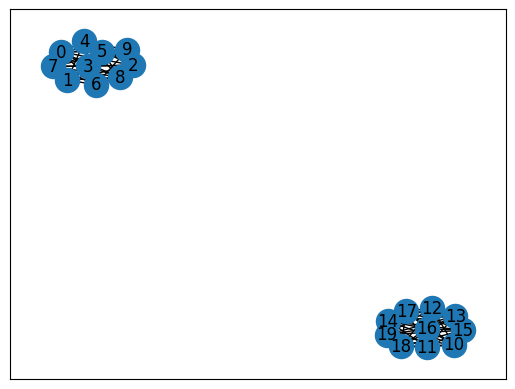

In [124]:
import networkx as nx
H =nx.Graph()
nodes=range(0,10)

for n in nodes:
    H.add_node(n, attr_dict={'team':0})
    for n1 in nodes:
        if( n > n1):
            H.add_edge(n,n1)


G =nx.Graph()
nodes1=range(10,20)

for n in nodes1:
    G.add_node(n, team=1)
    for n1 in nodes1:
        if( n > n1):
            G.add_edge(n,n1)

F = nx.compose(G,H)

nx.draw_networkx(F)

In [267]:
F = nx.Graph()
for i in range(0,100):
    nodes = range(i*20,i*20+20)
    H = nx.Graph()
    for n in nodes:
        H.add_node(n, team=i)
        for n1 in nodes:
            if( n > n1):
                H.add_edge(n,n1)
        

    F = nx.compose(F,H)

# nx.draw_networkx(F)


In [268]:
import random
for i in range(0,2000):
    for j in range(50):
            if random.uniform(0,1) > .4:
                u = random.choice(range(0,2000))
                if u != i:
                    F.add_edge(i,u)
                    print('random')

random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random
random

In [269]:
import random
from random import randrange
# random.uniform(0, 1)

def transfers(F):
    for n in F.nodes():
        if random.uniform(0,1) < .3:
            F.nodes[n]['team'] = 'left big 5'
            print('retired!')
        elif random.uniform(0,1) < .45 and F.nodes[n]['team'] != 'left big 5':
            print(F.nodes[n]['team'])
            ran = randrange(100)
            while(F.nodes[n]['team'] == ran):
                ran = randrange(100)
            teammates = [x for x in F.nodes() if F.nodes[x]['team'] == ran]
            F.nodes[n]['team'] = ran
            for t in teammates:
                if n != t:
                    F.add_edge(n,t)
            print(F.nodes[n]['team'])
            print('------------------')
    # nx.draw_networkx(F)



In [270]:
def newplayers(F, players):
     cplayers = F.number_of_nodes()
     for i in range(cplayers,cplayers+players):
         newteam = randrange(100)
         print(newteam)
         teammates = [x for x in F.nodes() if F.nodes[x]['team'] == newteam]
         while len(teammates) > 30:
             newteam = randrange(100)
             teammates = [x for x in F.nodes() if F.nodes[x]['team'] == newteam]
         F.add_node(i, team=newteam)
         for t in teammates:
              if i != t:
               F.add_edge(i,t)
         for j in range(50):
            if random.uniform(0,1) > .6:
                u = random.choice(range(0,cplayers))
                if u != i:
                    F.add_edge(i,u)
                    print('random')
            
     # nx.draw_networkx(F)


In [271]:
for i in range(0,13):
    transfers(F)
    newplayers(F, 592)

retired!
retired!
retired!
retired!
0
62
------------------
0
41
------------------
retired!
0
57
------------------
retired!
0
41
------------------
0
85
------------------
1
92
------------------
1
25
------------------
retired!
retired!
1
28
------------------
retired!
retired!
1
48
------------------
retired!
retired!
1
19
------------------
1
76
------------------
1
86
------------------
1
92
------------------
retired!
retired!
retired!
2
56
------------------
retired!
2
35
------------------
retired!
2
3
------------------
2
4
------------------
2
90
------------------
2
84
------------------
2
11
------------------
retired!
2
42
------------------
2
20
------------------
2
16
------------------
3
46
------------------
retired!
3
22
------------------
retired!
3
98
------------------
3
7
------------------
3
54
------------------
retired!
retired!
retired!
3
56
------------------
retired!
retired!
retired!
4
43
------------------
retired!
retired!
4
63
------------------
4
17
--

In [264]:
F.number_of_nodes()

9696

In [272]:
F.number_of_edges()

492163

452
24
101.51877062706271


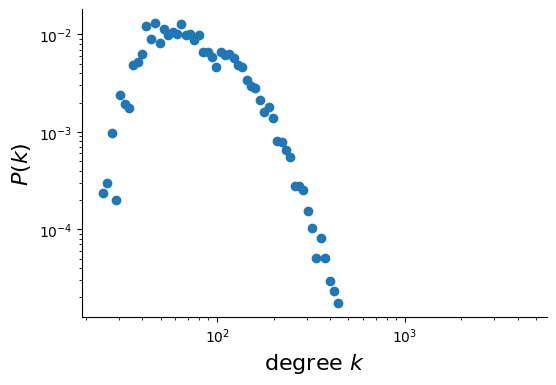

In [273]:
plot_degree_dist(F)

In [276]:
import gc
import pandas as pd
short_path_DP = []
for i in range(5):
    print(i)
    df444 = pd.read_csv(f'random_{i}.csv')
    DP = nx.from_pandas_edgelist(df444)
    if nx.is_connected(DP)==True:
            d_DP = nx.average_shortest_path_length(DP,weight=None)
    short_path_DP.append(d_DP)
    del df444
    gc.collect()
    df444=pd.DataFrame()
    
   
    

0
1


KeyboardInterrupt: 

In [280]:
import psutil 
import gc
print(psutil.virtual_memory().available)

1069682688


In [ ]:
clustering_DP = []
for i in range(100):
    df = pd.read_csv(f'random_{i}.csv')
    DP = nx.from_pandas_edgelist(df)
    c_DP = np.mean(list(nx.clustering(DP).values()))
    if nx.is_connected(DP)==True:
            d_DP = nx.average_shortest_path_length(DP,weight=None)
    clustering_DP.append(c_DP)
    
   

In [8]:
import networkx as nx

In [184]:
graphs = creategraphs(leagueedges, leaguenodes)
graphs

In [ ]:
Gp = nx.from_pandas_edgelist(premedges, edge_attr=['Season', 'Name1', 'Name2'])
Gp

In [ ]:
nodes_attr = prem.set_index('ID').to_dict(orient = 'index')
nx.set_node_attributes(Gp, nodes_attr)

In [ ]:
from networkx import betweenness_centrality
graphDict = betweenness_centrality(Gp)


In [ ]:
graphDict = dict(sorted(graphDict.items(), key=lambda item: item[1], reverse=True))
graphDict

In [12]:
G = nx.from_pandas_edgelist(edges, edge_attr=['Season', 'Name1', 'Name2'])
G

In [ ]:
nodes_attr = df5.set_index('ID').to_dict(orient = 'index')
nx.set_node_attributes(G, nodes_attr)

In [ ]:
G.nodes["0000acda"]["Name"]

In [102]:
for g in graphs:
    print(g.number_of_nodes())
    print(g.number_of_edges())

2508
100569
2396
70702
2059
61763
2563
80910
2671
81903


In [ ]:
from networkx import make_max_clique_graph
clique = make_max_clique_graph(G)

In [ ]:
GN = len(G.nodes())
max_L = GN*(GN-1)/2
actual_L = len(G.edges())
p = actual_L/max_L

ER = nx.erdos_renyi_graph(GN, p, directed=False)


In [ ]:
from networkx import attribute_assortativity_coefficient
lmao = attribute_assortativity_coefficient(ER, 'CountryFixed') + 1

lmao

In [ ]:
from networkx import attribute_assortativity_coefficient
lmao = attribute_assortativity_coefficient(G, 'CountryFixed')

lmao

In [169]:
dfl = pd.DataFrame(columns=['League', 'Country Similarity','Clustering Coefficient','AVG Shortest Path', 'Density', 'Rich Club', 'Small World' ,'Max Degree', 'Min Degree', 'Mean Degree'])
dfl

Empty DataFrame
Columns: [League, Country Similarity, Clustering Coefficient, AVG Shortest Path, Density, Rich Club, Small World, Max Degree, Min Degree, Mean Degree]
Index: []

In [ ]:
calculate_metrics(Gp,dfl)

In [156]:
from networkx import density
from networkx import make_max_clique_graph
d8temp = make_max_clique_graph(graphs[0])

KeyboardInterrupt: 

In [157]:
density(graphs[0])

0.03198985424543336

In [189]:
del list

In [190]:
def calculate_metrics(G,league):
    d1 = attribute_assortativity_coefficient(G, 'CountryFixed')
    print('10% Done')
    d2 = np.mean(list(nx.clustering(G).values()))
    print('20% Done')
    d3 = nx.average_shortest_path_length(G,weight=None)
    print('30% Done')
    # d4 = nx.average_neighbor_degree(G)
    print('40% Done')
    d5 = nx.rich_club_coefficient(G)
    print('50% Done')
    d6 = nx.omega(G)
    print('60% Done')
    d7 = density(G)
    degrees = [G.degree(n) for n in G.nodes()]
    print('70% Done')
    kmin = min(degrees)
    print('80% Done')
    kmax = max(degrees)
    print('90% Done')
    sum = 0
    for i in degrees:
        sum += i
    mean = sum / len(degrees)
    dftemp = {  'League' : league,
                'Country Similarity': d1,
                'Clustering Coefficient' : d2,
                'AVG Shortest Path': d3, 
                # 'Avg Nearest Neighbour Degree' : d4, 
                'Rich Club' : d5, 
                'Small World' : d6,
                'Density' : d7,
                'Max Degree' : kmax,
                'Min Degree': kmin, 
                'Mean Degree': mean }
    return dftemp

    # df = df.append(dftemp, ignore_index=True)


In [179]:
leagues

['1. Serie A ITA',
 '1. Premier League ENG',
 '1. Bundesliga GER',
 '1. La Liga ESP',
 '1. Ligue 1 FRA']

In [187]:
d2 = np.mean(list(nx.clustering(graphs[0]).values()))
C = np.mean(list(nx.clustering(G).values()))

TypeError: 'list' object is not callable

In [191]:
i = 0
for g in graphs:
    d = calculate_metrics(g ,leagues[i])
    dfl = dfl.append(d, ignore_index=True)
    i+=1
dfl

10% Done
20% Done
30% Done
40% Done
50% Done


KeyboardInterrupt: 

In [192]:
dfl

Empty DataFrame
Columns: [League, Country Similarity, Clustering Coefficient, AVG Shortest Path, Density, Rich Club, Small World, Max Degree, Min Degree, Mean Degree]
Index: []

In [136]:
dfl = dfl.append(d, ignore_index=True)
dfl

C:\Users\Owen\AppData\Local\Temp\ipykernel_20412\731999529.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfl = dfl.append(d, ignore_index=True)


League  Country Similarity  Clustering Coefficient  \
0  1. Serie A ITA                 NaN                0.637194   

   AVG Shortest Path Max Degree Min Degree  Mean Degree  
0           2.300257        363          2    80.198565

In [126]:
dfl

Empty DataFrame
Columns: [League, Country Similarity, Clustering Coefficient, AVG Shortest Path, Avg Nearest Neighbour Degree, Max Degree, Min Degree, Mean Degree]
Index: []

In [ ]:
DP = G.copy() # the function edits the graph in place

nx.double_edge_swap(DP,nswap=10*G.number_of_edges(), max_tries=10000000)


In [ ]:
for node, data in clique.nodes(data=True):
    print(data['Name'])


In [245]:
# Function Defintions
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
from sympy import deg
%matplotlib inline
import math
# Function Defintions

# Function to plot a degree distribution graph (P(k) vs k graph)
def plot_degree_dist(G):
    
    degrees = [G.degree(n) for n in G.nodes()]
    kmin = min(degrees)
    kmax = max(degrees)
    print(kmax)
    print(kmin)
    mybins = math.ceil(math.sqrt(G.number_of_nodes()))
    if kmin>0:
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=mybins)
    else:
        bin_edges = np.logspace(0, np.log10(kmax)+1, mybins=20)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    fig = plt.figure(figsize=(6,4))

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)
    plt.loglog(x, density, marker='o', linestyle='none')
    plt.xlabel(r"degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    sum = 0
    for i in degrees:
        sum += i
    mean = sum / len(degrees)
    print(mean)

In [ ]:
degree_freq = nx.degree_histogram(G)
degrees = range(len(degree_freq))
plt.figure(figsize=(20, 12)) 
plt.loglog(degrees[10:], degree_freq[10:],'go-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')


In [ ]:
plot_degree_dist(G)

In [ ]:
degrees = [G.degree(n) for n in G.nodes()]
# degreeNames2 = [n[1] for n in G.nodes(data=True) if(G.degree(n) > 400)]
degreeNames = []
for n in G.nodes(data=True):
    if(G.degree(n[0]) > 300):
    # print(n[1])
        degreeNames.append(n[1]["Name"])

degreeNames



In [ ]:
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

In [188]:
C = np.mean(list(nx.clustering(G).values()))
d = nx.average_shortest_path_length(G,weight=None)

print("Average Clustering Coefficient: ", C)
print("Average Shortest Path: ", d)

TypeError: 'list' object is not callable

In [ ]:
GN = len(G.nodes())
max_L = GN*(GN-1)/2
actual_L = len(G.edges())
p = actual_L/max_L

ER = nx.erdos_renyi_graph(GN, p, directed=False)

plot_degree_dist(ER)

In [ ]:
G.number_of_edges()

In [ ]:

DP = G.copy() # the function edits the graph in place

nx.double_edge_swap(DP,nswap=10*G.number_of_edges(), max_tries=10000000)
plot_degree_dist(DP)
plot_degree_dist(G)

In [ ]:
C = np.mean(list(nx.clustering(DP).values()))
d = nx.average_shortest_path_length(DP,weight=None)

print("Average Clustering Coefficient: ", C)
print("Average Shortest Path: ", d)

In [ ]:
clustering_ER = []
short_path_ER = []

for i in range(100): # 1000 is better
    
    ER = nx.erdos_renyi_graph(GN, p, directed=False)
    C_ER = np.mean(list(nx.clustering(ER).values()))
    if nx.is_connected(ER)==True:
        d_ER = nx.average_shortest_path_length(ER,weight=None)
    clustering_ER.append(C_ER)
    short_path_ER.append(d_ER)
    
print(np.mean(clustering_ER))
print(np.std(clustering_ER))

print(np.mean(short_path_ER))
print(np.std(short_path_ER))

In [ ]:
G.nodes["0000acda"]["Name"]

In [ ]:
G.edges["e94d79e3", "f4ec4fd0"]['Name2']
G.nodes["e94d79e3"]["Name2"]

In [ ]:
pip install python-louvain

In [ ]:
theFellas = list(G.nodes())
theFellas = theFellas[0:1000]

In [ ]:
H = G.subgraph(theFellas)
print(H.number_of_edges())

In [ ]:
from networkx.algorithms.community import greedy_modularity_communities
c = greedy_modularity_communities(G)
sorted(c[0])

In [ ]:
len(c)

In [ ]:
import matplotlib.pyplot as plt
color_map = []
for node in G:
    if node in c[0]:
        color_map.append('blue')
    else:
        color_map.append('green')
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

PREMIER LEAGUE

In [ ]:
plot_degree_dist(Gp)

In [ ]:
degrees = [ER.degree(n) for n in Gp.nodes()]

In [ ]:
def plot_deg(G, degrees):
    plt.figure(figsize=(15,5))
    plt.hist(degrees)
    

In [ ]:
plot_deg(Gp, degrees)

In [ ]:
GN = len(Gp.nodes())
max_L = GN*(GN-1)/2
actual_L = len(Gp.edges())
p = actual_L/max_L

ER = nx.erdos_renyi_graph(GN, p, directed=False)

plot_degree_dist(ER)

In [ ]:
C = np.mean(list(nx.clustering(Gp).values()))
d = nx.average_shortest_path_length(Gp,weight=None)

print("Average Clustering Coefficient: ", C)
print("Average Shortest Path: ", d)

In [ ]:
C = np.mean(list(nx.clustering(ER).values()))
d = nx.average_shortest_path_length(ER,weight=None)

print("Average Clustering Coefficient: ", C)
print("Average Shortest Path: ", d)

In [ ]:
DP = Gp.copy() # the function edits the graph in place

nx.double_edge_swap(DP,nswap=10*Gp.number_of_edges(), max_tries=1000000)
plot_degree_dist(DP)
plot_degree_dist(Gp)

In [ ]:
C = np.mean(list(nx.clustering(DP).values()))
d = nx.average_shortest_path_length(DP,weight=None)

print("Average Clustering Coefficient: ", C)
print("Average Shortest Path: ", d)

In [ ]:
def make_and_analyze(edges, league):
    edgesfiltered = edges.loc[edges[league] == 1]
    G = nx.from_pandas_edgelist(edgesfiltered, edge_attr=['Season', 'Name1', 'Name2'])
    #nodes_attr = nodes.set_index('ID').to_dict(orient = 'index')
    #nx.set_node_attributes(G, nodes_attr)
    print('------------------------------------------------------')
    print('Original Graph')
    C = np.mean(list(nx.clustering(G).values()))
    d = nx.average_shortest_path_length(G,weight=None)

    print("Average Clustering Coefficient for Original Graph: ", C)
    print("Average Shortest Path for Original Graph: ", d)
    print('Original Graph degree distribution:')
    plot_degree_dist(G)

    print('------------------------------------------------------')
    print('Erodos Ryeni')
    GN = len(G.nodes())
    max_L = GN*(GN-1)/2
    actual_L = len(G.edges())
    p = actual_L/max_L

    ER = nx.erdos_renyi_graph(GN, p, directed=False)

    C = np.mean(list(nx.clustering(ER).values()))
    d = nx.average_shortest_path_length(ER,weight=None)

    print("Average Clustering Coefficient for ER Graph: ", C)
    print("Average Shortest Path for ER Graph: ", d)

    plot_degree_dist(ER)
    print('-----------------------------------------------------')
    print('DP Graph:')
    DP = G.copy() # the function edits the graph in place

    nx.double_edge_swap(DP,nswap=10*G.number_of_edges(), max_tries=10000000)

    C = np.mean(list(nx.clustering(DP).values()))
    d = nx.average_shortest_path_length(DP,weight=None)

    print("Average Clustering Coefficient for DP Graph: ", C)
    print("Average Shortest Path for DP Graph: ", d)

    plot_degree_dist(DP)
    print('-----------------------------------------------------')
    
    

In [22]:
def ensemble(G):
    clustering_DP = []
    short_path_DP = []
    graphs = []
    for i in range(100): # 1000 is better
        print(i)
        DP = G.copy() # the function edits the graph in place
        nx.double_edge_swap(DP,nswap=10*G.number_of_edges(), max_tries=10000000)
        c_DP = np.mean(list(nx.clustering(DP).values()))
        if nx.is_connected(DP)==True:
            d_DP = nx.average_shortest_path_length(DP,weight=None)
        clustering_DP.append(c_DP)
        short_path_DP.append(d_DP)
        # GN = len(G.nodes())
        # max_L = GN*(GN-1)/2
        # actual_L = len(G.edges())
        # p = actual_L/max_L

        # ER = nx.erdos_renyi_graph(GN, p, directed=False)
        # graphs.append(ER)
        
    # print(np.mean(clustering_DP))
    # print(np.std(clustering_DP))

    # print(np.mean(short_path_DP))
    # print(np.std(short_path_DP))


In [23]:
ensemble(G)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


In [ ]:
make_and_analyze(edges, 'Big5')